### Clustering Customers

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('segmentation data.csv')

In [3]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [7]:
df.corr()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
x=df.drop('ID',axis=1)

In [12]:
model=KMeans(4)
model=model.fit(x)
tahmin=model.predict(x)
tahmin

array([1, 3, 2, ..., 2, 1, 2])

In [13]:
x.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [14]:
silhouette_score(x,tahmin)

0.5429921618470235

In [16]:
x['cluster']=tahmin
x.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,0,0,67,2,124670,1,2,1
1,1,1,22,1,150773,1,2,3
2,0,0,49,1,89210,0,0,2
3,0,0,45,1,171565,1,1,3
4,0,0,53,1,149031,1,1,3


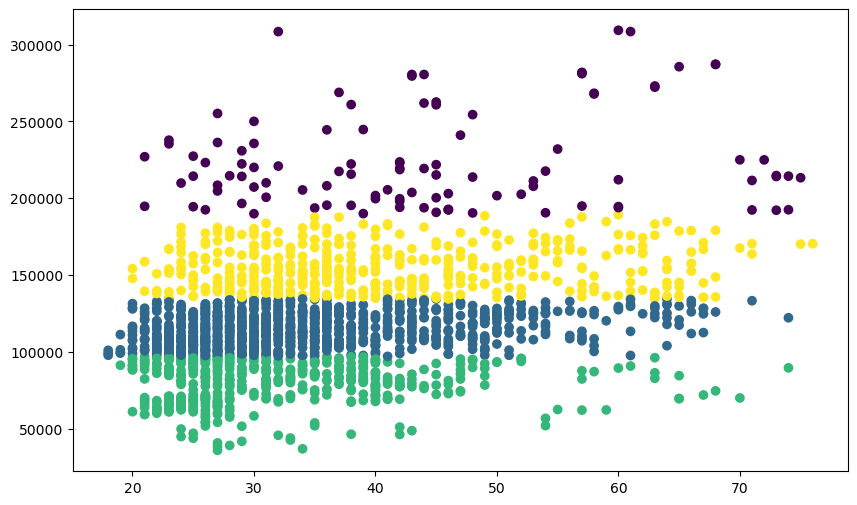

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(x.Age,x.Income,c=tahmin);

In [21]:
allscore=[]
allcluster=[]
distances=[]
def clust(kactane):
    for i in range(1,kactane):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        distance=model.inertia_
        print('Cluster ',i," score: ", score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [22]:
clust(10)

Cluster  2  score:  0.5834469001954301
Cluster  3  score:  0.5123353678268024
Cluster  4  score:  0.5429921630905726
Cluster  5  score:  0.5401417513180815
Cluster  6  score:  0.5426454043785547
Cluster  7  score:  0.5288177454589259
Cluster  8  score:  0.5403965261996514
Cluster  9  score:  0.5338052497348955
Cluster  10  score:  0.5360042898273114


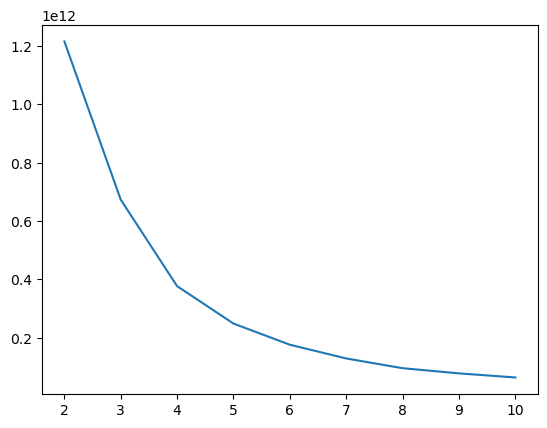

In [23]:
plt.plot(allcluster,distances);

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [25]:
link_data=linkage(x,method='ward', metric='euclidean')

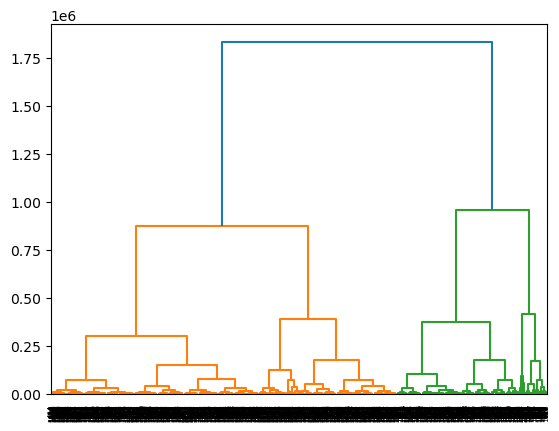

In [26]:
dendrogram(link_data)
plt.show()

In [27]:
from sklearn.cluster import DBSCAN

In [29]:
clusters=DBSCAN(eps=2.5,min_samples=4).fit(x)
set(clusters.labels_)

{-1}

In [35]:
x[x["cluster"]==3]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
1,1,1,22,1,150773,1,2,3
3,0,0,45,1,171565,1,1,3
4,0,0,53,1,149031,1,1,3
5,0,0,35,1,144848,0,0,3
6,0,0,53,1,156495,1,1,3
...,...,...,...,...,...,...,...,...
1550,1,1,37,1,145140,1,1,3
1583,1,1,31,1,138307,1,1,3
1592,1,1,44,2,143343,1,1,3
1594,1,0,33,1,138525,1,1,3
